In [80]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier 
from scipy.stats import mode 
from sklearn.preprocessing import StandardScaler

In [81]:
df = pd.read_csv('/content/Diabetes Database.csv')
#df.mean()

In [82]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [83]:
df_copy = df.copy(deep = True)
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
df_copy.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

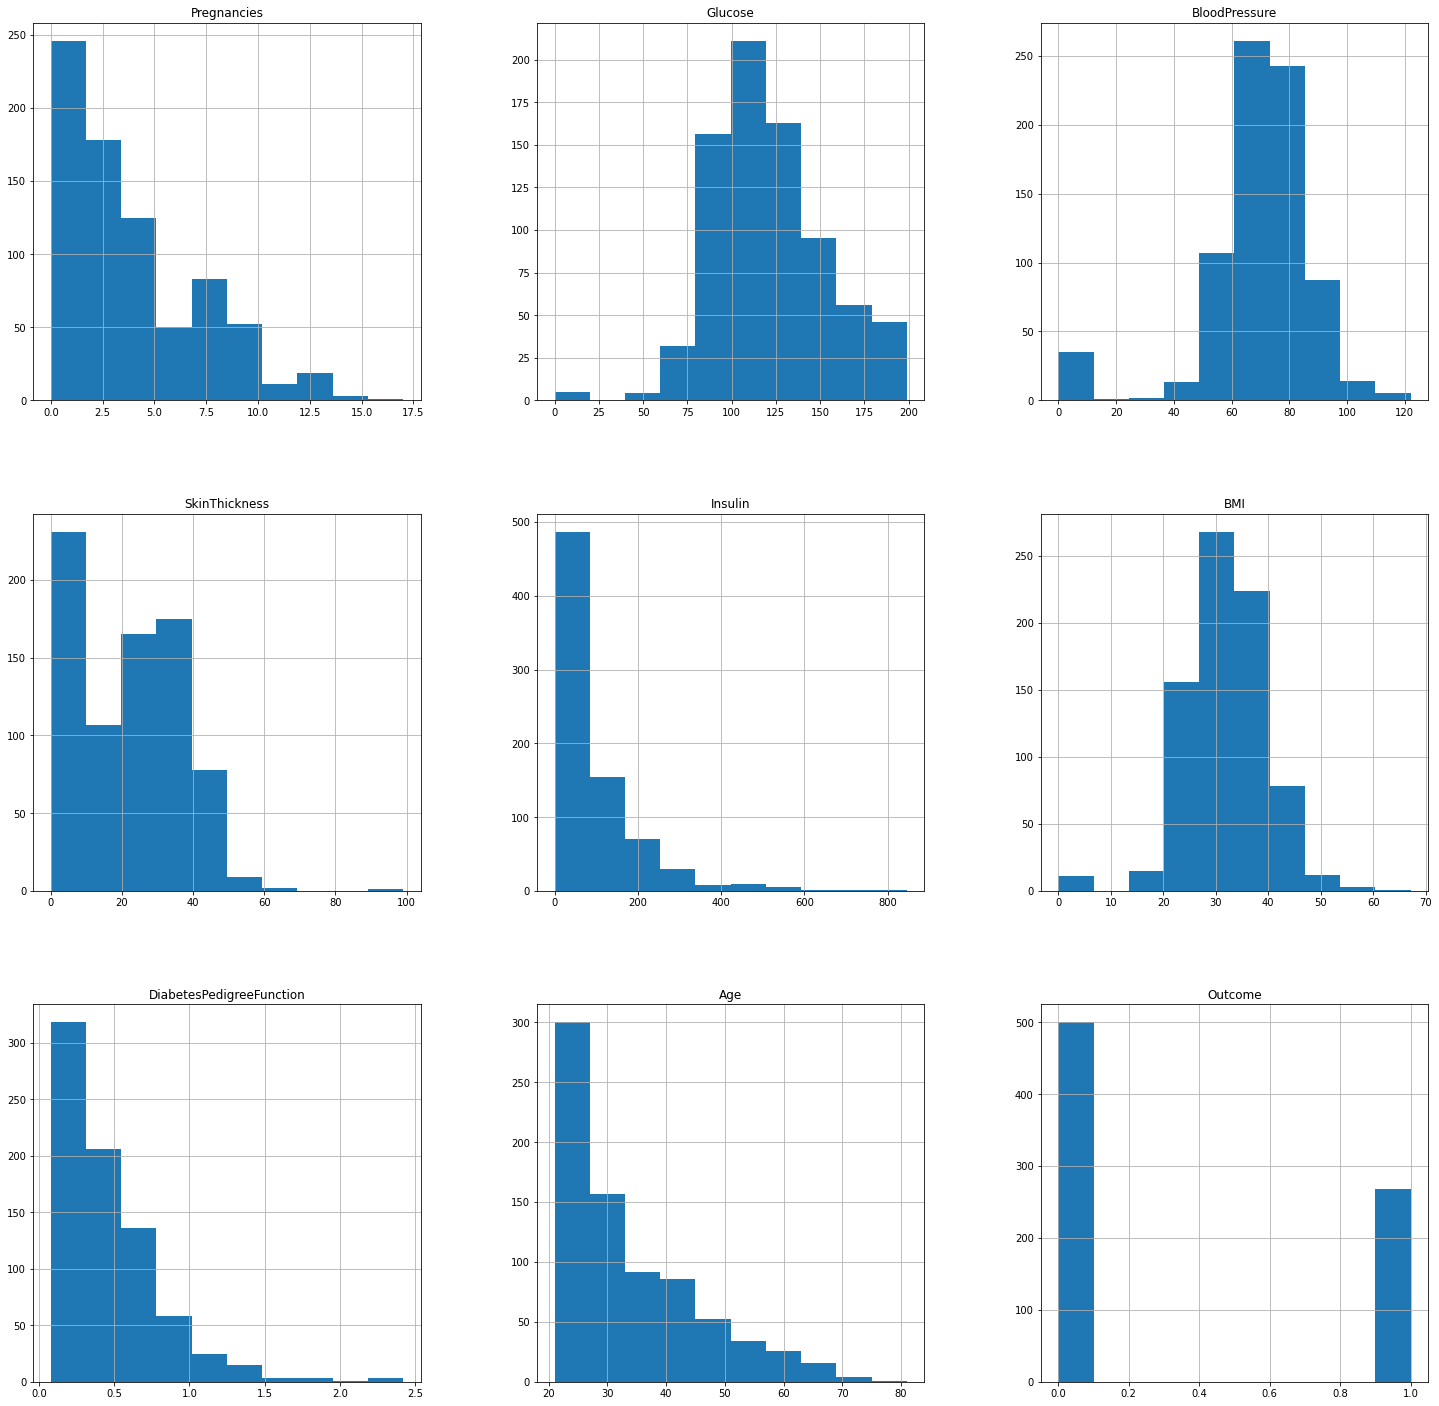

In [84]:
plot = df.hist(figsize = (25,25))

In [85]:
df_copy['Glucose'].fillna(df_copy['Glucose'].median(), inplace = True)
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(), inplace = True)
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median(), inplace = True)
df_copy['Insulin'].fillna(df_copy['Insulin'].median(), inplace = True)
df_copy['BMI'].fillna(df_copy['BMI'].median(), inplace = True)
df_copy.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

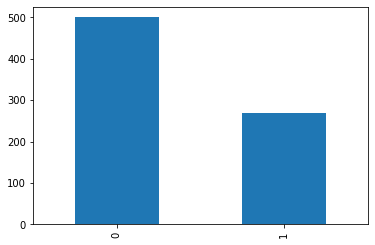

In [86]:
df.Outcome.value_counts().plot(kind="bar")

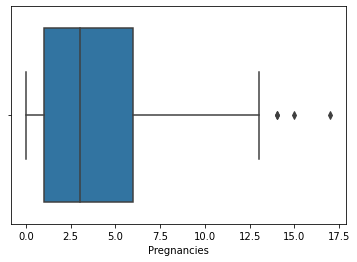

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(x=df["Pregnancies"])

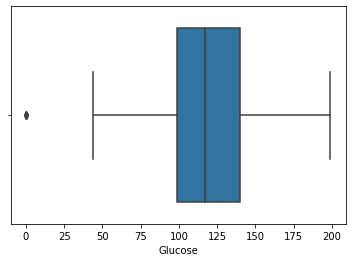

In [88]:
sns.boxplot(x=db["Glucose"])

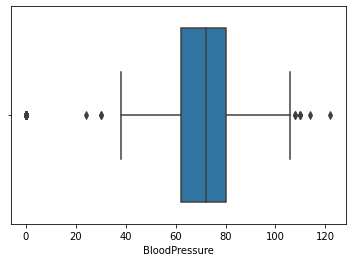

In [89]:
sns.boxplot(x=df["BloodPressure"])

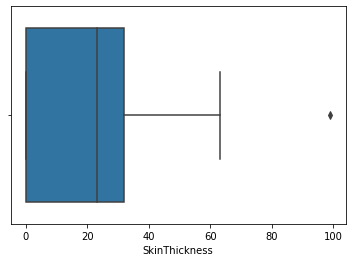

In [90]:
sns.boxplot(x=df["SkinThickness"])

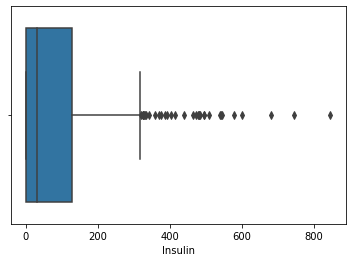

In [91]:
sns.boxplot(x=df["Insulin"])

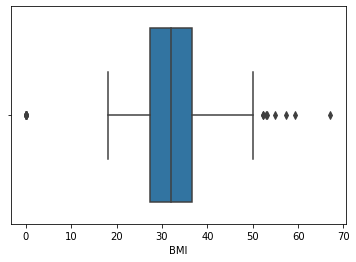

In [92]:
sns.boxplot(x=df["BMI"])

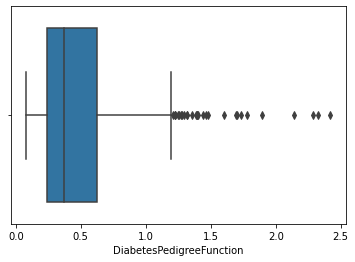

In [93]:
sns.boxplot(x=df["DiabetesPedigreeFunction"])

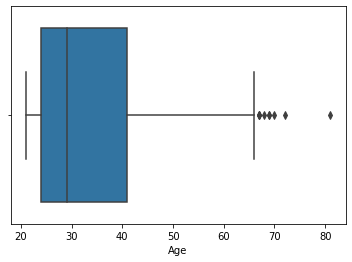

In [94]:
sns.boxplot(x=df["Age"])

In [95]:
Q1 = df["BloodPressure"].quantile(0.25)
Q3 = df["BloodPressure"].quantile(0.75)
IQR = Q3 - Q1
df["BloodPressure"] = df["BloodPressure"][~((df["BloodPressure"] < (Q1 - 1.5 * IQR)) |(df["BloodPressure"] > (Q3 + 1.5 * IQR)))]
#Removing Outliers For Insulin
Q1 = df["Insulin"].quantile(0.25)
Q3 = df["Insulin"].quantile(0.75)
IQR = Q3 - Q1
df["Insulin"] = df["Insulin"][~((df["Insulin"] < (Q1 - 1.5 * IQR)) |(df["Insulin"] > (Q3 + 1.5 * IQR)))]
#Removing Outliers for BMI
Q1 = df["BMI"].quantile(0.25)
Q3 = df["BMI"].quantile(0.75)
IQR = Q3 - Q1
df["BMI"] = df["BMI"][~((df["BMI"] < (Q1 - 1.5 * IQR)) |(df["BMI"] > (Q3 + 1.5 * IQR)))]
#Removing Outliers for DPF
Q1 = df["DiabetesPedigreeFunction"].quantile(0.25)
Q3 = df["DiabetesPedigreeFunction"].quantile(0.75)
IQR = Q3 - Q1
df["DiabetesPedigreeFunction"] = df["DiabetesPedigreeFunction"][~((df["DiabetesPedigreeFunction"] < (Q1 - 1.5 * IQR)) |(df["DiabetesPedigreeFunction"] > (Q3 + 1.5 * IQR)))]
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             723 non-null    float64
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   734 non-null    float64
 5   BMI                       749 non-null    float64
 6   DiabetesPedigreeFunction  739 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 54.1 KB


In [96]:
df.dropna(subset = ["Insulin","BloodPressure","BMI","DiabetesPedigreeFunction","Age"], inplace=True)
df.info(verbose=True)
scaler = StandardScaler()
df.iloc[:,:-1] = scaler.fit_transform(df.iloc[:,:-1])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 656 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               656 non-null    int64  
 1   Glucose                   656 non-null    int64  
 2   BloodPressure             656 non-null    float64
 3   SkinThickness             656 non-null    int64  
 4   Insulin                   656 non-null    float64
 5   BMI                       656 non-null    float64
 6   DiabetesPedigreeFunction  656 non-null    float64
 7   Age                       656 non-null    int64  
 8   Outcome                   656 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 51.2 KB


In [97]:
class KNN() :  
    def __init__( self, K ) :
        self.K = K 
    # Function to store training set 
    def fit( self, X_train, Y_train ) : 
        self.X_train = X_train
        self.Y_train = Y_train 
          
        # no_of_training_examples, no_of_features 
        self.m, self.n = X_train.shape 
      
    # Function for prediction 
    def predict( self, X_test ) : 
        self.X_test = X_test 
          
        # no_of_test_examples, no_of_features       
        self.m_test, self.n = X_test.shape 
    
        # initialize Y_predict 
        Y_predict = np.zeros( self.m_test ) 
        for i in range( self.m_test ) : 
            x = self.X_test[i] 
              
            # find the K nearest neighbors from current test example 
            neighbors = np.zeros( self.K ) 
            neighbors = self.find_neighbors( x ) 
              
            # most frequent class in K neighbors 
            Y_predict[i] = mode( neighbors )[0][0]    
        return Y_predict 
      
    # Function to find the K nearest neighbors to current test example 
    def find_neighbors( self, x ) : 
        # calculate all the euclidean distances between current  
        # test example x and training set X_train 
        euclidean_distances = np.zeros( self.m ) 
        for i in range( self.m ) : 
            d = self.euclidean( x, self.X_train[i] ) 
            euclidean_distances[i] = d 
          
        # sort Y_train according to euclidean_distance_array and  
        # store into Y_train_sorted 
        inds = euclidean_distances.argsort() 
        Y_train_sorted = self.Y_train[inds] 
        return Y_train_sorted[:self.K] 
      
    # Function to calculate euclidean distance 
    def euclidean( self, x, x_train ) : 
        return np.sqrt( np.sum( np.square( x - x_train ) ) ) 
  
# Driver code 
def main() : 
    # Importing dataset 
    X = df.iloc[:,:-1].values 
    Y = df.iloc[:,-1:].values 
      
    # Splitting dataset into train and test set 
    X_train, X_test, Y_train, Y_test = train_test_split(  X, Y, test_size = 1/3, random_state = 0 ) 
      
    # Model training 
    model = KNN( K = 3 ) 
    model.fit( X_train, Y_train ) 
    model1 = KNeighborsClassifier( n_neighbors = 3 ) 
    model1.fit( X_train, Y_train ) 
      
    # Prediction on test set 
    Y_pred = model.predict( X_test ) 
    Y_pred1 = model1.predict( X_test ) 
      
    # measure performance 
    correctly_classified = 0
    correctly_classified1 = 0
      
    # counter 
    count = 0
    for count in range( np.size( Y_pred ) ) : 
        if Y_test[count] == Y_pred[count] : 
            correctly_classified = correctly_classified + 1
        if Y_test[count] == Y_pred1[count] : 
            correctly_classified1 = correctly_classified1 + 1
        count = count + 1
    print( "Accuracy on test set by sklearn model   :  ", (  
      correctly_classified1 / count ) * 100 )

In [98]:
if __name__ == "__main__" :  
    main()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:64: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Accuracy on test set by sklearn model   :   75.34246575342466
